<a href="https://colab.research.google.com/github/MateuszPasternak/PythonForML_AGH/blob/main/DataPrepForRegression_V2_MS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stackoverflow_full.csv')

In [ ]:
data.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [ ]:
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
from sklearn.preprocessing import (
  MinMaxScaler,
  StandardScaler,
)

Categorical Values

In [ ]:
df_numerical = data.select_dtypes("number")
df_categorical = data.select_dtypes("object")

In [ ]:
df_categorical["Age"] = df_categorical["Age"].replace({"<35": 1, ">35": 0})
df_numerical["Age"] = df_categorical[["Age"]]

In [ ]:
df_categorical["MentalHealth"] = df_categorical["MentalHealth"].replace({"No": 0, "Yes": 1})
df_numerical["MentalHealth"] = df_categorical[["MentalHealth"]]

In [ ]:
df3 = df_categorical.copy()

df_num = pd.get_dummies(df3,
                     columns = ['EdLevel'])
df_num = pd.get_dummies(df_num,
                     columns = ['Gender'])
df_num = pd.get_dummies(df_num,
                     columns = ['Accessibility'])

#display(df3)
df_num.head()

,Age,MentalHealth,MainBranch,Country,HaveWorkedWith,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,1,0,Dev,Sweden,C++;Python;Git;PostgreSQL,1,0,0,0,0,1,0,0,1,0
1,1,0,Dev,Spain,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,0,0,0,0,1,1,0,0,1,0
2,1,0,Dev,Germany,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,1,0,0,0,0,1,0,0,1,0
3,1,0,Dev,Canada,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,0,0,0,0,1,1,0,0,1,0
4,0,0,NotDev,Singapore,C++;Python,0,0,0,1,0,1,0,0,1,0


In [ ]:
df_num.drop(['MainBranch', 'Country', 'HaveWorkedWith'], axis=1)

,Age,MentalHealth,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,1,0,1,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,0,1,1,0,0,1,0
2,1,0,1,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,1,1,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,0,0,0,0,1,1,0,0,1,0
73458,0,0,0,0,0,0,1,1,0,0,1,0
73459,1,0,0,0,0,0,1,1,0,0,1,0
73460,1,1,0,0,0,0,1,1,0,0,0,1


In [ ]:
for i in df_num:
  df_numerical[i] = df_num[i]

In [ ]:
data = df_numerical
data.head()

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,Age,MentalHealth,MainBranch,...,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,0,1,7,4,51552.0,4,0,1,0,Dev,...,1,0,0,0,0,1,0,0,1,0
1,1,1,12,5,46482.0,12,1,1,0,Dev,...,0,0,0,0,1,1,0,0,1,0
2,2,1,15,6,77290.0,7,0,1,0,Dev,...,1,0,0,0,0,1,0,0,1,0
3,3,1,9,6,46135.0,13,0,1,0,Dev,...,0,0,0,0,1,1,0,0,1,0
4,4,0,40,30,160932.0,2,0,0,0,NotDev,...,0,0,0,1,0,1,0,0,1,0


In [ ]:
np.count_nonzero(data['MentalHealth'] == 1)

16504

In [ ]:
np.count_nonzero(data['MentalHealth'] == 0)

56895

In [ ]:
np.count_nonzero(np.isnan(data['MentalHealth']))

0

In [ ]:
np.unique(data['MentalHealth'])

array([0, 1])

In [ ]:
data_size = data[data['YearsCodePro'] >= 0]
data_size = data_size[data_size['YearsCodePro'] <= 5]
np.count_nonzero(data_size['MentalHealth'])

7460

In [ ]:
data_size = data[data['YearsCodePro'] >= 0]
data_size = data_size[data_size['YearsCodePro'] <= 5]
len(data_size)

31482

Data split (testing, training)

In [ ]:
data = data.dropna()

In [ ]:
data = data.drop_duplicates()

In [ ]:
from sklearn.model_selection import train_test_split

#Unnamed: 0 	Age 	Accessibility 	EdLevel 	Employment 	Gender 	MentalHealth 	MainBranch 	YearsCode
#YearsCodePro 	Country 	PreviousSalary 	HaveWorkedWith 	ComputerSkills 	Employed

data = data.drop(['Unnamed: 0', 'Employment', 'Country', 'HaveWorkedWith',
               'MainBranch','ComputerSkills', 'Employed','Accessibility_No'], axis = 1)

y = data['MentalHealth']

Data_train, Data_test = train_test_split(data, test_size=0.2, random_state=1)
Data_train, Data_val = train_test_split(Data_train, test_size=0.25, random_state=1)

dataX = Data_train[Data_train['YearsCodePro'] <= Data_train['YearsCode']]

Data operation on train set

Normalizing data

In [ ]:
X_train = dataX.drop(['MentalHealth'], axis = 1)
y_train = dataX['MentalHealth']

X_test = Data_test.drop(['MentalHealth'], axis = 1)
y_test = Data_test['MentalHealth']

X_val = Data_val.drop(['MentalHealth'], axis = 1)
y_val = Data_val['MentalHealth']

In [ ]:
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
dataTrain_normalized = minmax_scaler.fit_transform(X_train)
dataTrain_normalized_old = minmax_scaler.fit_transform(Data_train)

**Less features**

In [ ]:
XX_train = dataX.drop(['MentalHealth','YearsCodePro','YearsCode'], axis = 1)
yy_train = dataX['MentalHealth']

XX_test = Data_test.drop(['MentalHealth','YearsCodePro','YearsCode'], axis = 1)
yy_test = Data_test['MentalHealth']

XX_val = Data_val.drop(['MentalHealth','YearsCodePro','YearsCode'], axis = 1)
yy_val = Data_val['MentalHealth']

minmax_scaler = MinMaxScaler().set_output(transform="pandas")
dataTrain_normalized_2 = minmax_scaler.fit_transform(XX_train)

<Axes: >

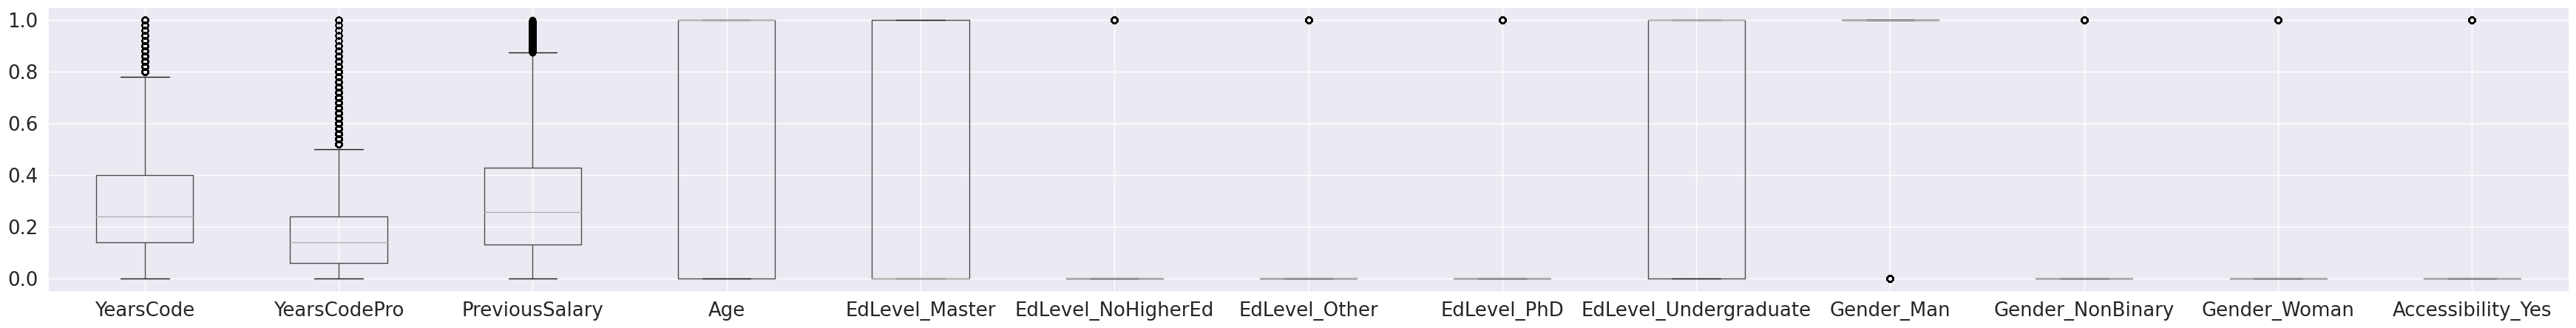

In [ ]:
sns.set_theme()
sns.set(font_scale=1.7)
plt.figure(figsize=(44, 5))
dataTrain_normalized.boxplot()

<Axes: xlabel='YearsCode', ylabel='YearsCodePro'>

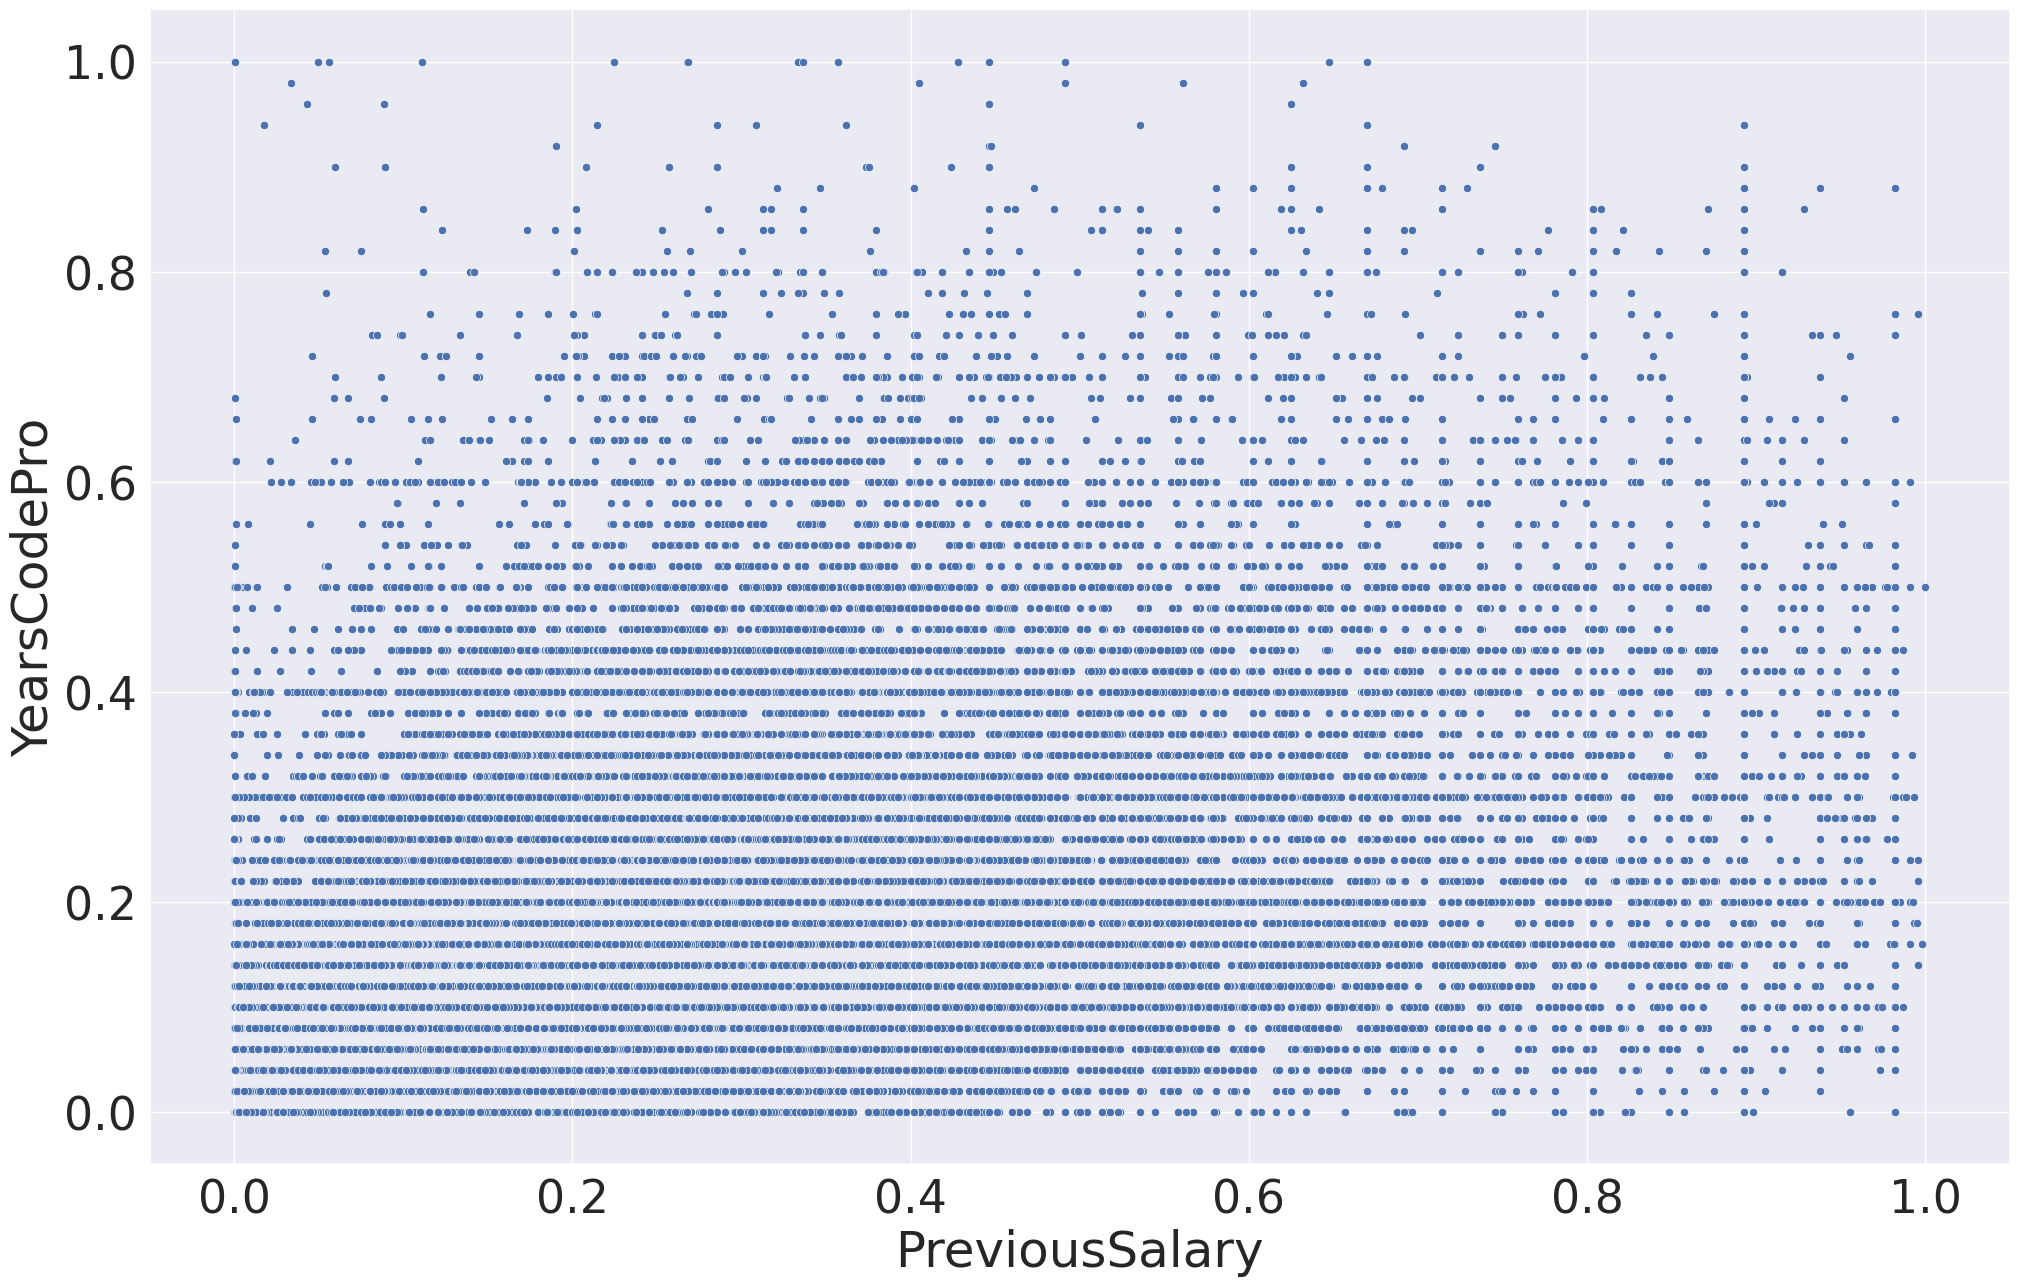

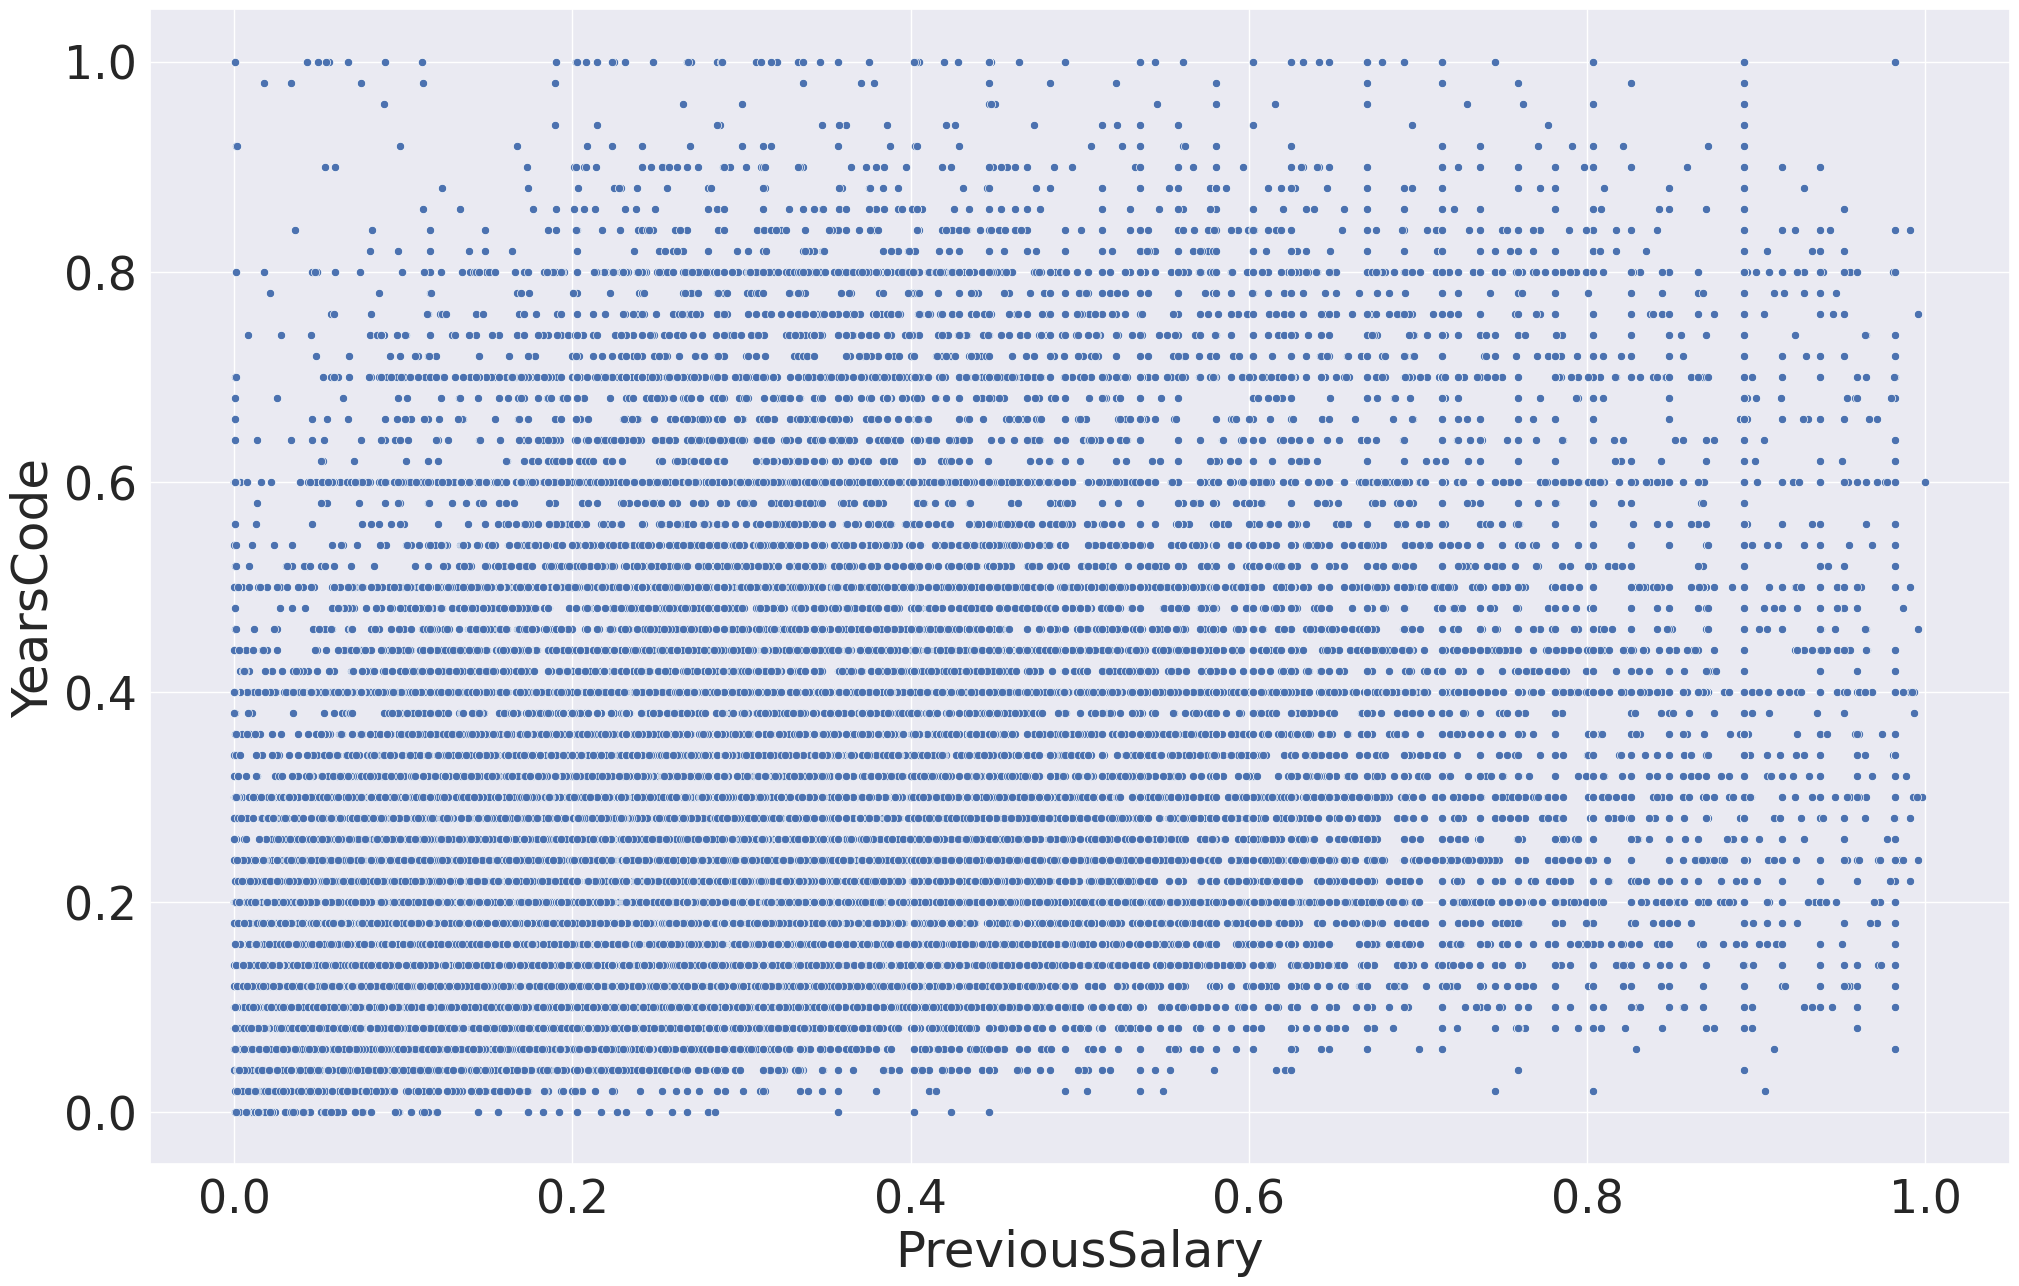

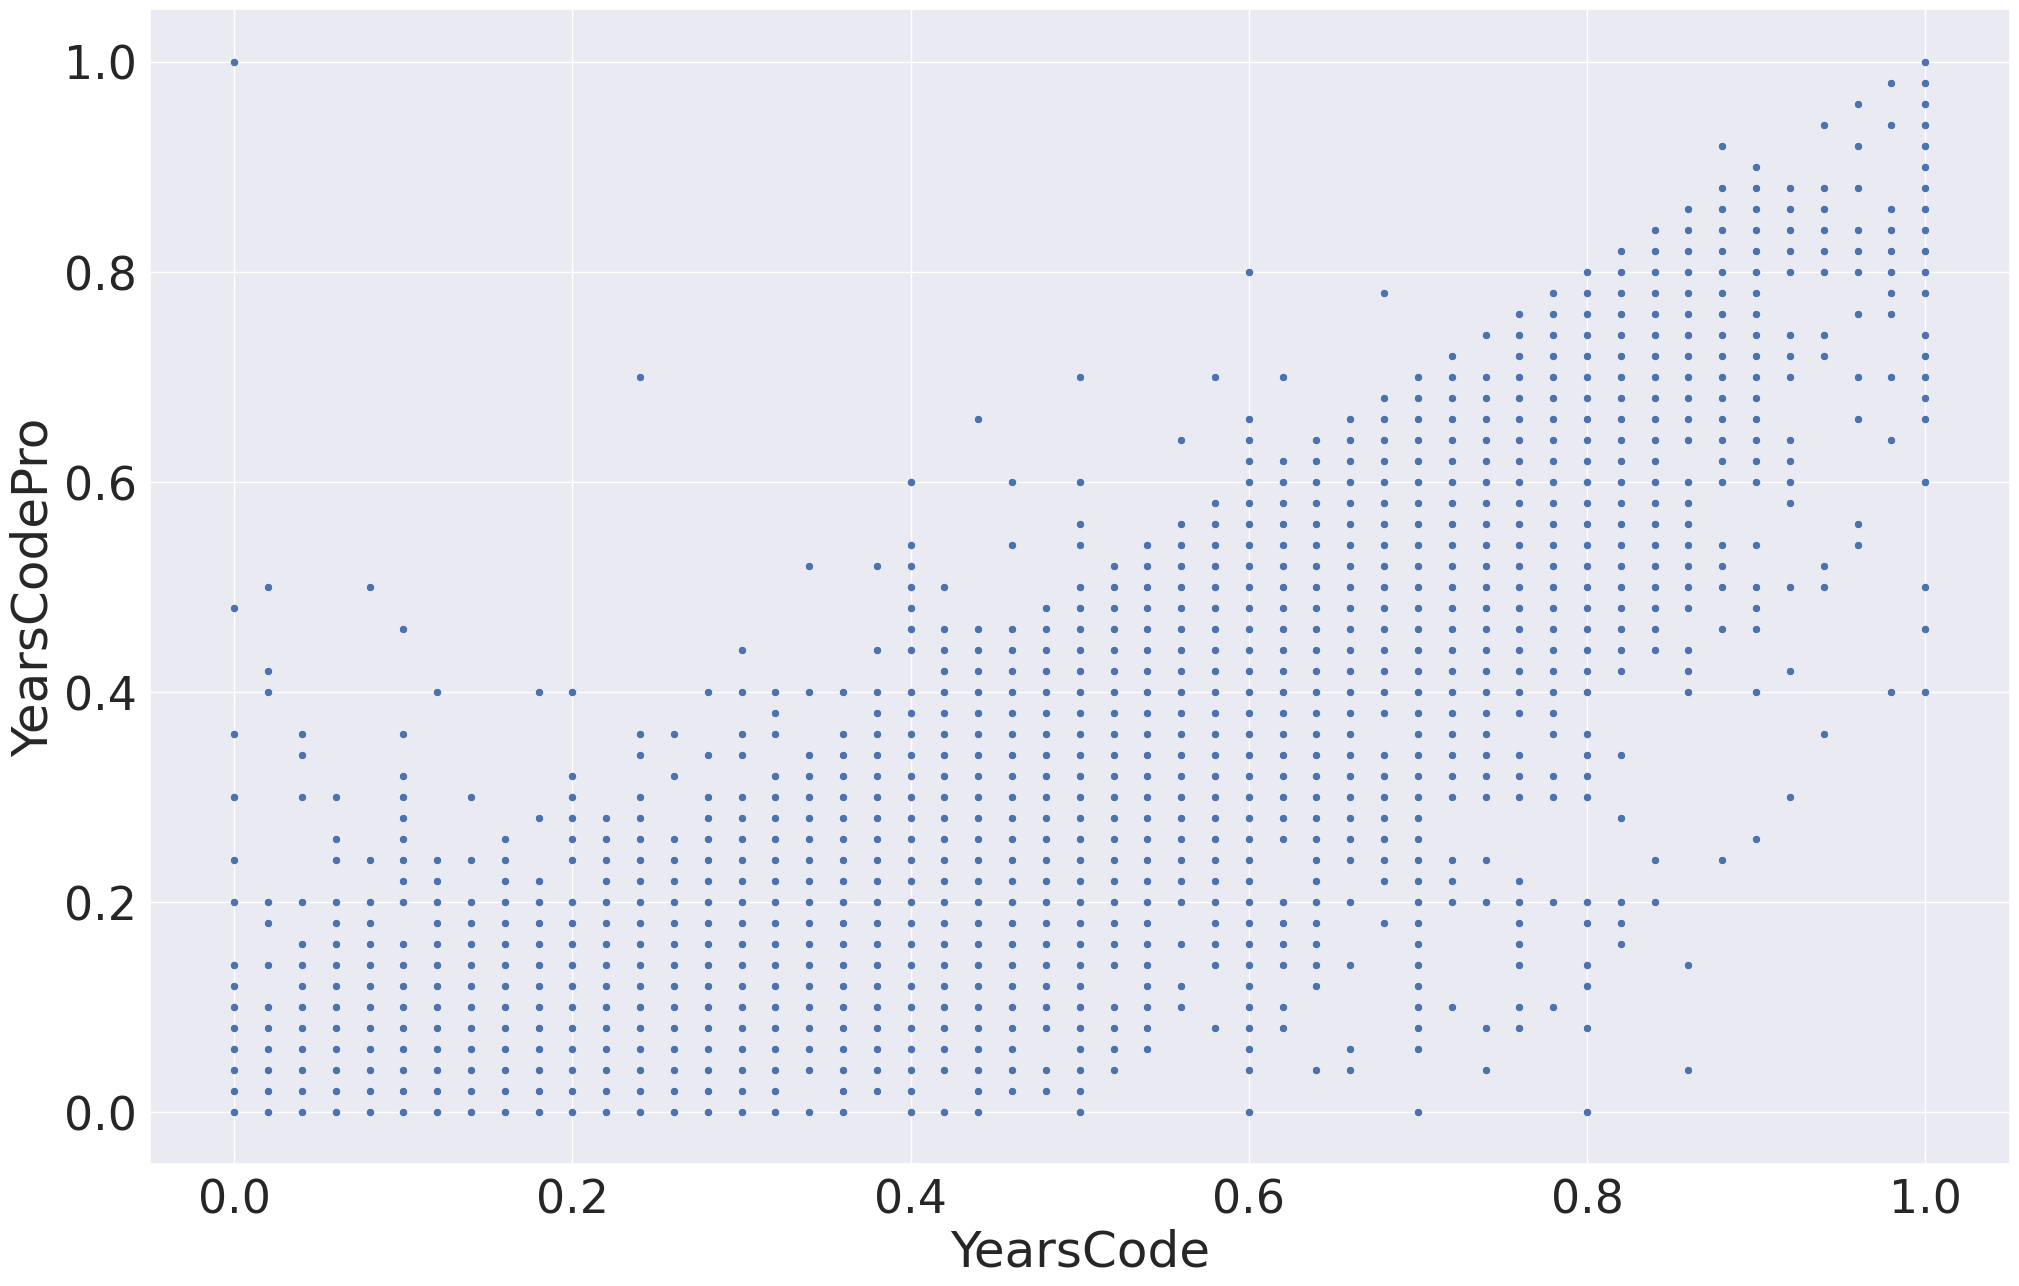

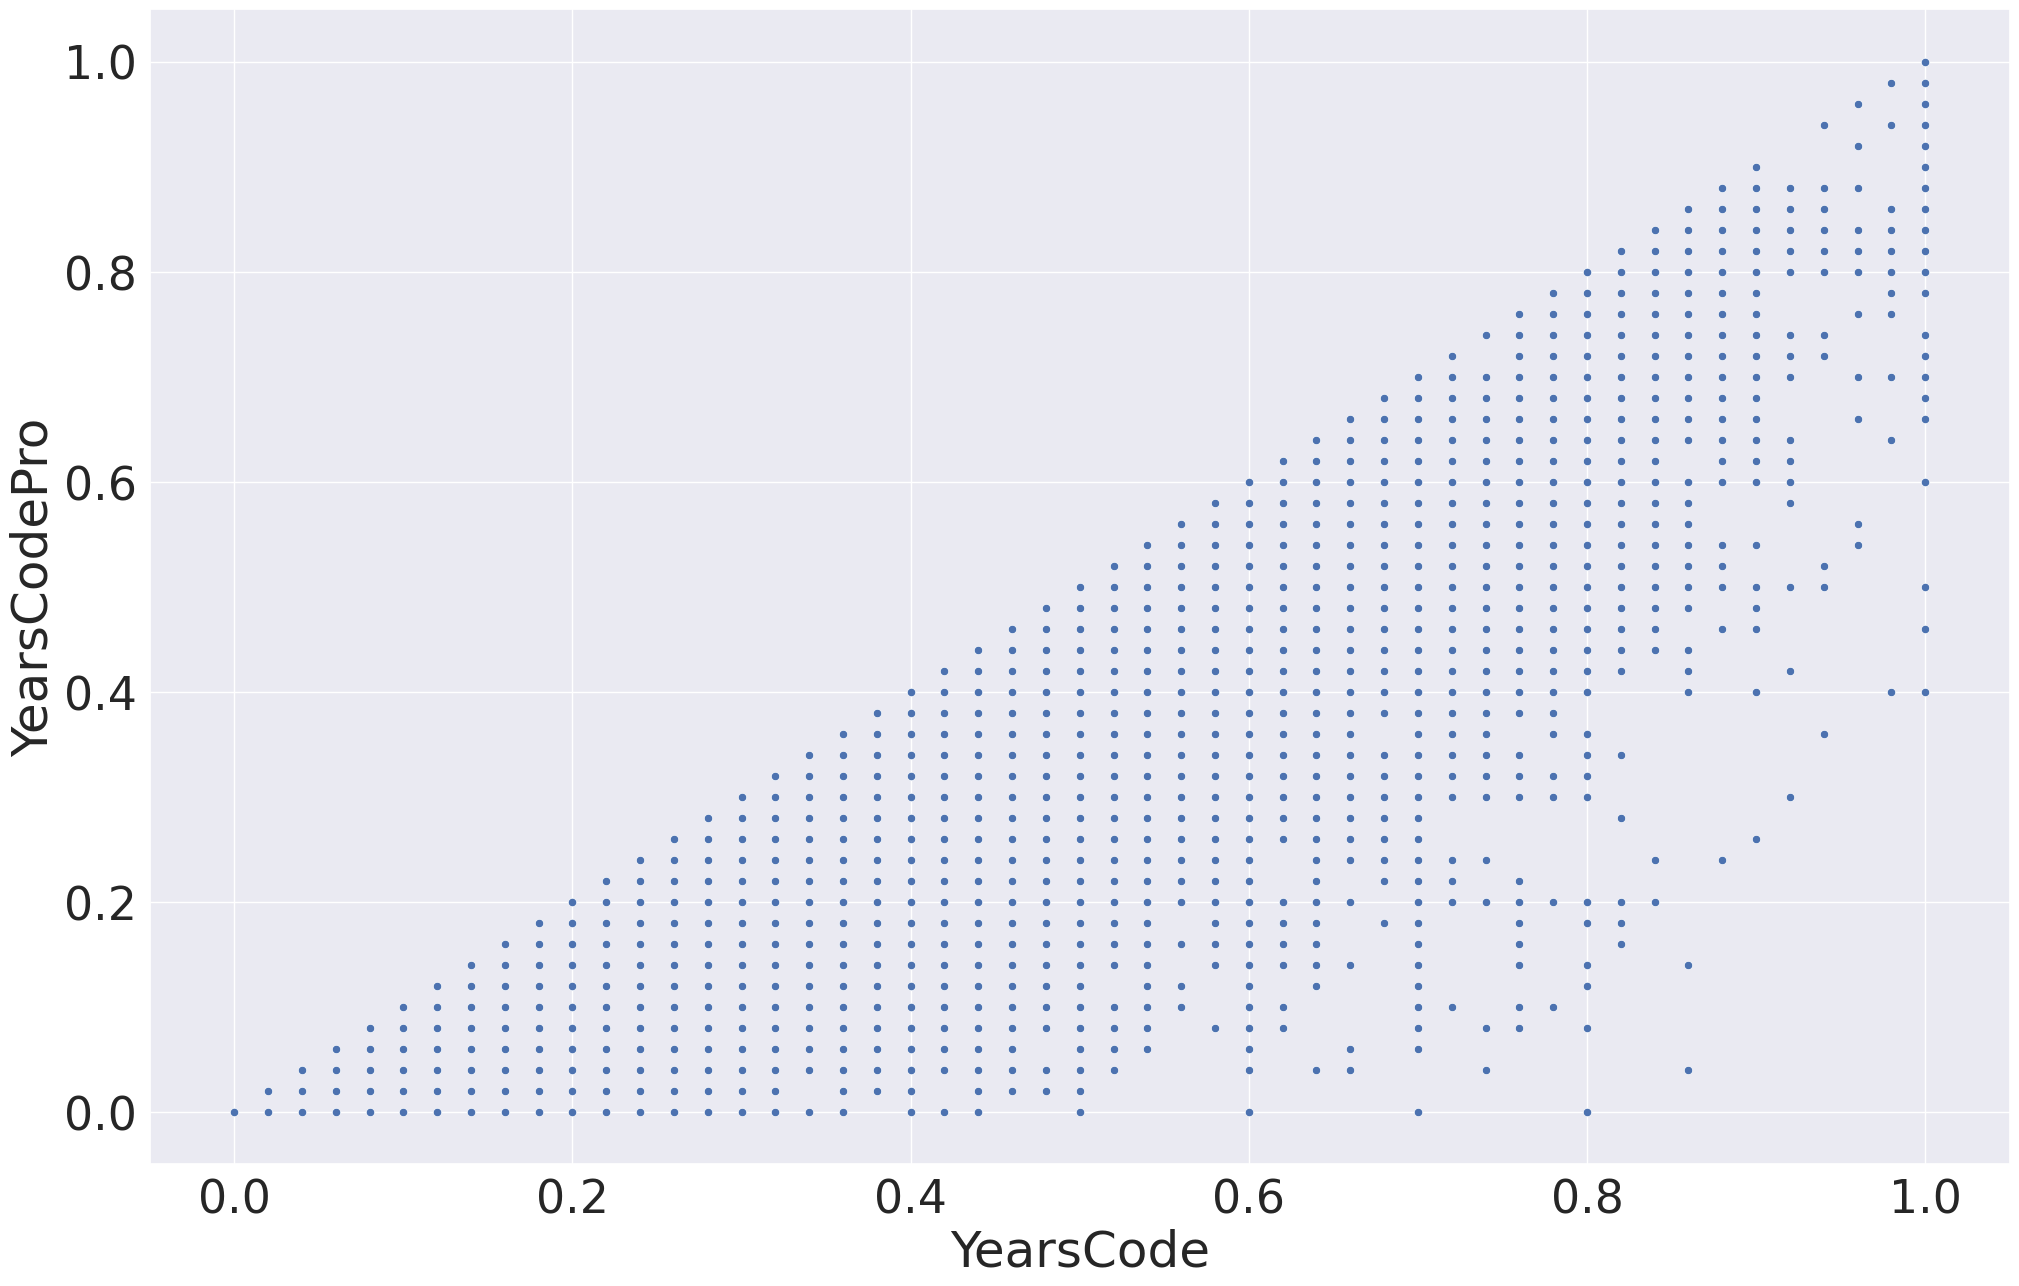

In [ ]:
sns.set_theme()
sns.set(font_scale=3.0)

plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='PreviousSalary', y='YearsCodePro')
plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='PreviousSalary', y='YearsCode')

plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized_old, x='YearsCode', y='YearsCodePro')
plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='YearsCode', y='YearsCodePro')

in report describe why have you cut data above line above

# **Classification Task**

Imports

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

Define classifiers

In [ ]:
#clf = svm.SVC(kernel='rbf')
#clf = MLPClassifier()
#clf = KNeighborsClassifier(n_neighbors=5)
#clf = tree.DecisionTreeClassifier(max_depth=3)

**SVM clasiffiers**

SVM classifier kernel linear

In [ ]:
clf = svm.SVC(kernel='linear', random_state=1)
clf.fit(dataTrain_normalized, y_train)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y_train, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7744786062590142, val: 0.3119891008174387
tn train: 33830, fp train: 0, fn train: 9851, tp train: 0
tn val: 1708, fp val: 9651, fn val: 449, tp val: 2872


In [ ]:
clf = svm.SVC(kernel='poly', degree=2, random_state=1)
clf.fit(dataTrain_normalized, y_train)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y_train, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7761727066688033, val: 0.7737738419618528
tn train: 33695, fp train: 135, fn train: 9642, tp train: 209
tn val: 11359, fp val: 0, fn val: 3321, tp val: 0


SVM classifier kernel poly

In [ ]:
clf = svm.SVC(kernel='poly', degree = 5, random_state=1)
clf.fit(dataTrain_normalized, y_train)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y_train, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7785307112932396, val: 0.22833787465940056
tn train: 33567, fp train: 263, fn train: 9411, tp train: 440
tn val: 44, fp val: 11315, fn val: 13, tp val: 3308


In [ ]:
clf = svm.SVC(kernel='poly', degree=3, random_state=1)
clf.fit(dataTrain_normalized, y_train)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y_train, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7774318353517548, val: 0.2269073569482289
tn train: 33553, fp train: 277, fn train: 9445, tp train: 406
tn val: 10, fp val: 11349, fn val: 0, tp val: 3321


**MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(5,15), solver='lbfgs', max_iter=5000, random_state=1, early_stopping=True)
x_frames = [dataTrain_normalized, X_val]
x_11 = pd.concat(x_frames)
y_frames = [y_train, y_val]
y_11 = pd.concat(y_frames)
clf.fit(x_11, y_11)

y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_mlp = accuracy_score(y_train, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7531878848927451, val: 0.7735694822888284
tn train: 31699, fp train: 2131, fn train: 8650, tp train: 1201
tn val: 11356, fp val: 3, fn val: 3321, tp val: 0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10, 30, 20), solver='lbfgs', max_iter=5000, random_state=1, early_stopping=True)
x_frames = [dataTrain_normalized, X_val]
x_11 = pd.concat(x_frames)
y_frames = [y_train, y_val]
y_11 = pd.concat(y_frames)
clf.fit(x_11, y_11)

y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_mlp = accuracy_score(y_train, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.2255213937409858, val: 0.22622615803814713
tn train: 0, fp train: 33830, fn train: 0, tp train: 9851
tn val: 0, fp val: 11359, fn val: 0, tp val: 3321


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
np.count_nonzero(y == 1)

16504

In [ ]:
np.count_nonzero(y_train == 1)

9851

In [ ]:
np.count_nonzero(y_test == 1)

3247

In [ ]:
np.count_nonzero(y_val == 1)

3321

In [ ]:
np.count_nonzero(y_pred_train == 1)

43681

In [ ]:
np.count_nonzero(y_pred == 1)

14680

<Axes: >

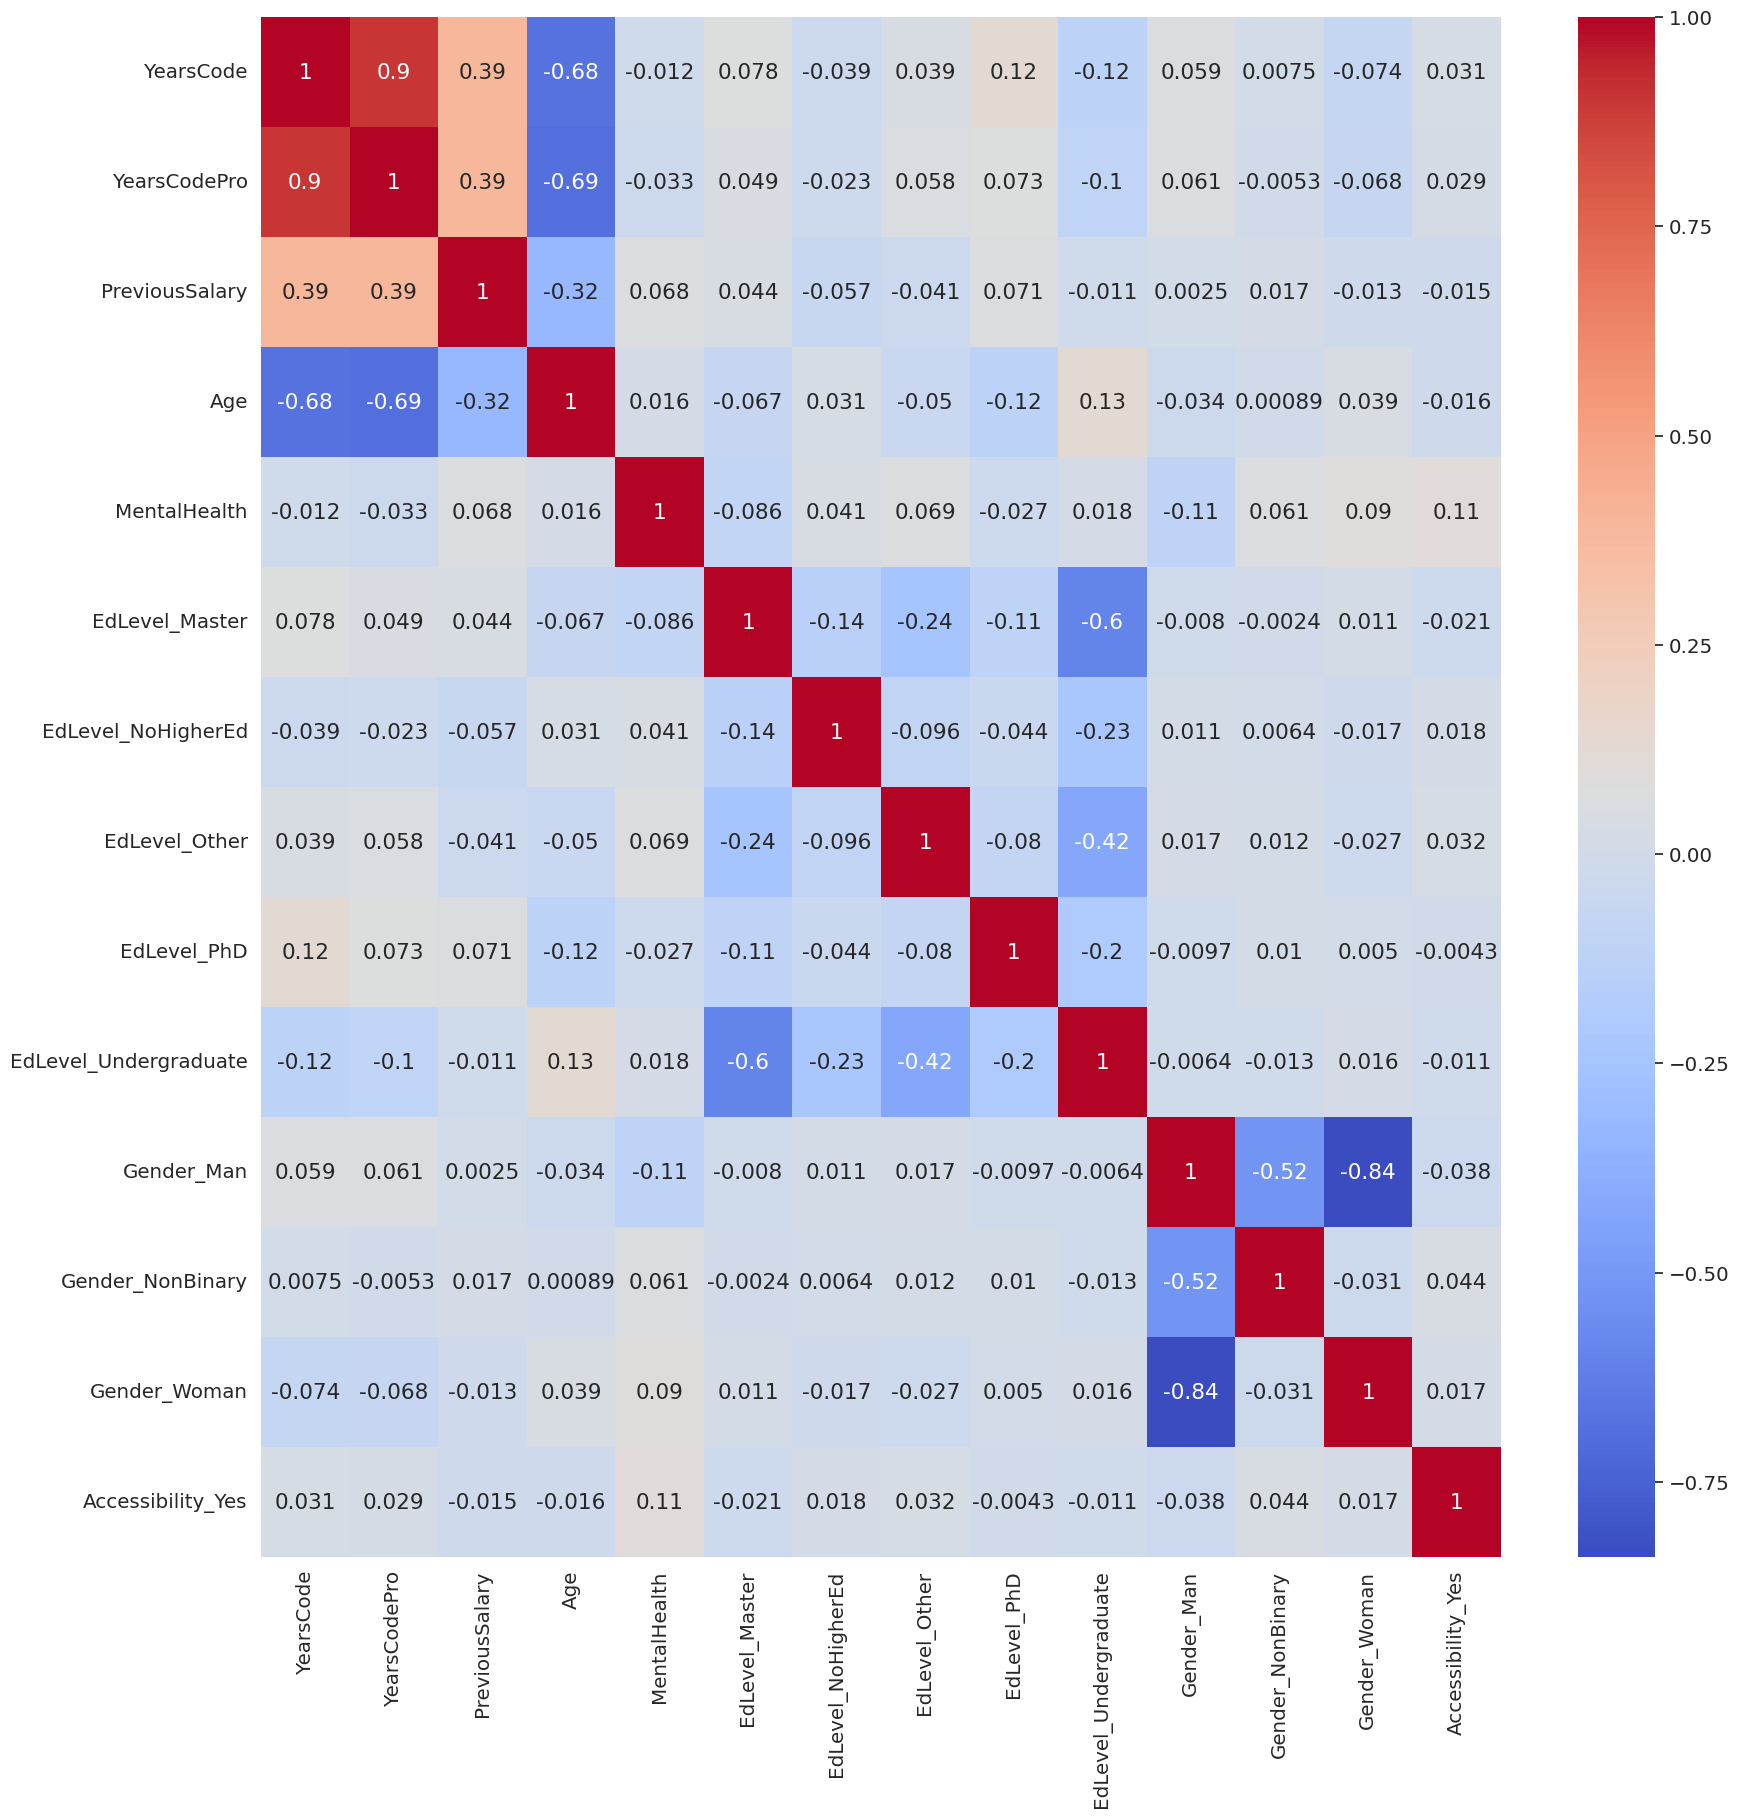

In [ ]:
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
# Apply the default theme
sns.set_theme()
sns.set(font_scale=1.3)
plt.figure(figsize=(20, 20))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10, 30, 20), solver='lbfgs', max_iter=5000, random_state=1, early_stopping=True)
x_frames = [dataTrain_normalized_2, XX_val]
x_11 = pd.concat(x_frames)
y_frames = [yy_train, yy_val]
y_11 = pd.concat(y_frames)
clf.fit(x_11, y_11)

y_pred_train = clf.predict(dataTrain_normalized_2)
y_pred = clf.predict(XX_val)

acc_train_mlp = accuracy_score(y_train, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = svm.SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='recall')
grid_search.fit(dataTrain_normalized, y_train)
print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_) # to get the best estimator
print(grid_search.cv_results_) # to get all results

{'C': 10, 'kernel': 'rbf'}
SVC(C=10)
{'mean_fit_time': array([ 24.71749969,  53.21562629, 124.13303227,  84.27526541]), 'std_fit_time': array([ 1.24405901,  6.52319441, 16.14550293,  9.13552963]), 'mean_score_time': array([ 5.17351975, 11.58049364,  5.39659653, 12.57890549]), 'std_score_time': array([1.02264806, 1.83964523, 1.23229362, 1.10484965]), 'param_C': masked_array(data=[1, 1, 10, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'linear'}, {'C': 10, 'kernel': 'rbf'}], 'split0_test_score': array([0.        , 0.04363267, 0.        , 0.04414003]), 'split1_test_score': array([0.        , 0.03654822, 0.        , 0.03401015]), 'split2_test_score': array([0.        , 0.02944162, 0

{'C': 10, 'kernel': 'rbf'}

SVC(C=10)

{'mean_fit_time': array([ 24.71749969,  53.21562629, 124.13303227,  84.27526541]),
'std_fit_time': array([ 1.24405901,  6.52319441, 16.14550293,  9.13552963]), 'mean_score_time': array([ 5.17351975, 11.58049364,  5.39659653, 12.57890549]), 'std_score_time': array([1.02264806, 1.83964523, 1.23229362, 1.10484965]), 'param_C': masked_array(data=[1, 1, 10, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
            'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
            'params': [{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'linear'}, {'C': 10, 'kernel': 'rbf'}],
            'split0_test_score': array([0.        , 0.04363267, 0.        , 0.04414003]),
            'split1_test_score': array([0.        , 0.03654822, 0.        , 0.03401015]),
            'split2_test_score': array([0.        , 0.02944162, 0.        , 0.03553299]),
            'split3_test_score': array([0.        , 0.04213198, 0.        , 0.04619289]),
            'split4_test_score': array([0.        , 0.02690355, 0.        , 0.04162437]),
            'mean_test_score': array([0.        , 0.03573161, 0.        , 0.04030009]),
            'std_test_score': array([0.        , 0.00665668, 0.        , 0.00476471]),
            'rank_test_score': array([3, 2, 3, 1], dtype=int32)}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = svm.SVC()
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 2, 3, 4]}
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='recall')
grid_search.fit(dataTrain_normalized, y_train)
print(grid_search.best_params_) # to get the best parameters
print(grid_search.best_estimator_) # to get the best estimator
print(grid_search.cv_results_) # to get all results

KeyboardInterrupt: ignored



{'C': 2, 'kernel': 'rbf'}
SVC(C=2)
{'mean_fit_time': array([ 25.597756  ,  50.8397613 ,  57.47973781,  25.16166506,
        56.70398326,  82.34530554,  25.65283246,  60.21124907,
        98.8068243 ,  25.80652585,  62.93411484, 125.68957858]), 'std_fit_time': array([ 1.28232979,  2.18278612,  4.51021243,  1.05864735,  4.08552566,
       10.16741645,  1.34877192,  3.13033731,  7.58079728,  1.60891139,
        4.25348632, 15.74756203]), 'mean_score_time': array([ 5.41924109, 11.12578559,  7.10408559,  5.96039758, 11.40023103,
        6.69706931,  5.50477591, 11.5370965 ,  7.60977139,  5.27688661,
       10.47465353,  7.19707541]), 'std_score_time': array([1.2672079 , 1.6590817 , 1.10648797, 1.46399199, 1.43837186,
       0.78452628, 1.02649324, 1.06287454, 1.31487548, 1.19772568,
       0.93590357, 1.35982735]), 'param_C': masked_array(data=[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'rbf', 'poly', 'linear', 'rbf', 'poly',
                   'linear', 'rbf', 'poly', 'linear', 'rbf', 'poly'],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'poly'}, {'C': 2, 'kernel': 'linear'}, {'C': 2, 'kernel': 'rbf'}, {'C': 2, 'kernel': 'poly'}, {'C': 3, 'kernel': 'linear'}, {'C': 3, 'kernel': 'rbf'}, {'C': 3, 'kernel': 'poly'}, {'C': 4, 'kernel': 'linear'}, {'C': 4, 'kernel': 'rbf'}, {'C': 4, 'kernel': 'poly'}], 'split0_test_score': array([0.        , 0.04363267, 0.04363267, 0.        , 0.04515474,
       0.04363267, 0.        , 0.0421106 , 0.04160325, 0.        ,
       0.04312532, 0.04109589]), 'split1_test_score': array([0.        , 0.03654822, 0.03807107, 0.        , 0.03705584,
       0.03654822, 0.        , 0.03553299, 0.03604061, 0.        ,
       0.03604061, 0.03604061]), 'split2_test_score': array([0.        , 0.02944162, 0.02538071, 0.        , 0.03401015,
       0.02741117, 0.        , 0.03401015, 0.0284264 , 0.        ,
       0.03553299, 0.0284264 ]), 'split3_test_score': array([0.        , 0.04213198, 0.03756345, 0.        , 0.04263959,
       0.03908629, 0.        , 0.04365482, 0.04162437, 0.        ,
       0.04060914, 0.04314721]), 'split4_test_score': array([0.        , 0.02690355, 0.03299492, 0.        , 0.03857868,
       0.03248731, 0.        , 0.03959391, 0.03807107, 0.        ,
       0.03959391, 0.03807107]), 'mean_test_score': array([0.        , 0.03573161, 0.03552857, 0.        , 0.0394878 ,
       0.03583313, 0.        , 0.0389805 , 0.03715314, 0.        ,
       0.03898039, 0.03735623]), 'std_test_score': array([0.        , 0.00665668, 0.00609393, 0.        , 0.00396973,
       0.0055507 , 0.        , 0.0037044 , 0.00485864, 0.        ,
       0.00285435, 0.00508929]), 'rank_test_score': array([9, 7, 8, 9, 1, 6, 9, 2, 5, 9, 3, 4], dtype=int32)}

Płatne usługi Colab - Tutaj możesz anulować umowy


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
MLP = MLPClassifier(max_iter = 3000)
distributions = dict(alpha=uniform(loc=0, scale=4), hidden_layer_sizes=[(5), (10),
 (15), (20), (5, 5), (5, 10), (5,15), (5, 20), (10, 5), (10, 5), (10, 10), (10, 15),
  (10, 20), (15, 5), (15, 10), (15, 15), (15, 20), (20, 5), (20, 10), (20, 15), (20, 20),
   (5, 5, 5), (10, 10, 10), (15, 15, 15), (20, 20, 20)], solver=['sgd','adam', 'lbfgs'],
                     early_stopping=[True, False], momentum=uniform(loc=0, scale=1))

clf = RandomizedSearchCV(MLP, distributions, random_state=0, scoring='recall')

search = clf.fit(dataTrain_normalized, y_train)

print(search.best_params_) # to get the best parameters
print(search.best_estimator_) # to get the best estimator
print(search.cv_results_) # to get all results

In [ ]:
print(search.best_params_) # to get the best parameters
print(search.best_estimator_) # to get the best estimator
print(search.cv_results_) # to get all results

{'alpha': 2.0873932870002867, 'early_stopping': True, 'hidden_layer_sizes': (15, 15, 15), 'momentum': 0.26455561210462697, 'solver': 'lbfgs'}
MLPClassifier(alpha=2.0873932870002867, early_stopping=True,
              hidden_layer_sizes=(15, 15, 15), max_iter=3000,
              momentum=0.26455561210462697, solver='lbfgs')
{'mean_fit_time': array([  3.38599029,   2.25342736,   7.34547472,  33.42183695,
         8.56704125,  36.35325289,  23.54065614, 191.82697659,
         1.31621466,   2.58622327]), 'std_fit_time': array([ 0.90249734,  0.48922957,  2.10511258,  2.04468358,  0.94365482,
        4.83972793,  0.69284807, 37.0099769 ,  0.15275145,  0.42798768]), 'mean_score_time': array([0.01685719, 0.01673708, 0.01482501, 0.01741447, 0.01108966,
       0.01399603, 0.01364417, 0.01454396, 0.00993409, 0.0196321 ]), 'std_score_time': array([0.00754344, 0.00517321, 0.00511099, 0.00547163, 0.00170506,
       0.0055297 , 0.00469979, 0.00322471, 0.0004019 , 0.00678996]), 'param_alpha': masked_a

{'alpha': 2.0873932870002867, 'early_stopping': True, 'hidden_layer_sizes': (15, 15, 15), 'momentum': 0.26455561210462697, 'solver': 'lbfgs'}
MLPClassifier(alpha=2.0873932870002867, early_stopping=True,
              hidden_layer_sizes=(15, 15, 15), max_iter=3000,
              momentum=0.26455561210462697, solver='lbfgs')
{'mean_fit_time': array([  3.38599029,   2.25342736,   7.34547472,  33.42183695,
         8.56704125,  36.35325289,  23.54065614, 191.82697659,
         1.31621466,   2.58622327]), 'std_fit_time': array([ 0.90249734,  0.48922957,  2.10511258,  2.04468358,  0.94365482,
        4.83972793,  0.69284807, 37.0099769 ,  0.15275145,  0.42798768]), 'mean_score_time': array([0.01685719, 0.01673708, 0.01482501, 0.01741447, 0.01108966,
       0.01399603, 0.01364417, 0.01454396, 0.00993409, 0.0196321 ]), 'std_score_time': array([0.00754344, 0.00517321, 0.00511099, 0.00547163, 0.00170506,
       0.0055297 , 0.00469979, 0.00322471, 0.0004019 , 0.00678996]), 'param_alpha': masked_array(data=[2.195254015709299, 2.4942547871438894,
                   3.854651042004117, 2.2721782443757292,
                   0.08087358976130288, 3.914473368931056,
                   2.882530618903667, 2.0873932870002867,
                   1.8246013288661942, 0.5986994687347327],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_early_stopping': masked_array(data=[False, True, True, False, False, True, False, True,
                   True, True],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_hidden_layer_sizes': masked_array(data=[5, (5, 5), 10, (15, 5), (5, 10), (20, 5), (10, 5),
                   (15, 15, 15), 5, (20, 20)],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_momentum': masked_array(data=[0.6027633760716439, 0.2975346065444723,
                   0.7917250380826646, 0.3373961604172684,
                   0.7781567509498505, 0.46147936225293185,
                   0.5373732294490107, 0.26455561210462697,
                   0.018789800436355142, 0.38648898112586194],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_solver': masked_array(data=['adam', 'sgd', 'lbfgs', 'sgd', 'sgd', 'lbfgs', 'sgd',
                   'lbfgs', 'adam', 'sgd'],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 2.195254015709299, 'early_stopping': False, 'hidden_layer_sizes': 5, 'momentum': 0.6027633760716439, 'solver': 'adam'}, {'alpha': 2.4942547871438894, 'early_stopping': True, 'hidden_layer_sizes': (5, 5), 'momentum': 0.2975346065444723, 'solver': 'sgd'}, {'alpha': 3.854651042004117, 'early_stopping': True, 'hidden_layer_sizes': 10, 'momentum': 0.7917250380826646, 'solver': 'lbfgs'}, {'alpha': 2.2721782443757292, 'early_stopping': False, 'hidden_layer_sizes': (15, 5), 'momentum': 0.3373961604172684, 'solver': 'sgd'}, {'alpha': 0.08087358976130288, 'early_stopping': False, 'hidden_layer_sizes': (5, 10), 'momentum': 0.7781567509498505, 'solver': 'sgd'}, {'alpha': 3.914473368931056, 'early_stopping': True, 'hidden_layer_sizes': (20, 5), 'momentum': 0.46147936225293185, 'solver': 'lbfgs'}, {'alpha': 2.882530618903667, 'early_stopping': False, 'hidden_layer_sizes': (10, 5), 'momentum': 0.5373732294490107, 'solver': 'sgd'}, {'alpha': 2.0873932870002867, 'early_stopping': True, 'hidden_layer_sizes': (15, 15, 15), 'momentum': 0.26455561210462697, 'solver': 'lbfgs'}, {'alpha': 1.8246013288661942, 'early_stopping': True, 'hidden_layer_sizes': 5, 'momentum': 0.018789800436355142, 'solver': 'adam'}, {'alpha': 0.5986994687347327, 'early_stopping': True, 'hidden_layer_sizes': (20, 20), 'momentum': 0.38648898112586194, 'solver': 'sgd'}], 'split0_test_score': array([0.        , 0.        , 0.05022831, 0.        , 0.01725013,
       0.06595637, 0.        , 0.06341958, 0.        , 0.        ]), 'split1_test_score': array([0.        , 0.        , 0.05076142, 0.        , 0.        ,
       0.05126904, 0.        , 0.05076142, 0.00913706, 0.        ]), 'split2_test_score': array([0.        , 0.        , 0.05583756, 0.        , 0.00913706,
       0.05329949, 0.        , 0.05888325, 0.        , 0.        ]), 'split3_test_score': array([0.00203046, 0.        , 0.05076142, 0.        , 0.        ,
       0.05126904, 0.        , 0.06446701, 0.        , 0.        ]), 'split4_test_score': array([0.        , 0.0035533 , 0.04213198, 0.        , 0.00964467,
       0.04517766, 0.        , 0.04416244, 0.        , 0.00304569]), 'mean_test_score': array([0.00040609, 0.00071066, 0.04994414, 0.        , 0.00720637,
       0.05339432, 0.        , 0.05633874, 0.00182741, 0.00060914]), 'std_test_score': array([0.00081218, 0.00142132, 0.0044086 , 0.        , 0.00654849,
       0.00684633, 0.        , 0.00777239, 0.00365482, 0.00121827]), 'rank_test_score': array([8, 6, 3, 9, 4, 2, 9, 1, 5, 7], dtype=int32)}



In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(alpha=2.0873932870002867, early_stopping=True, hidden_layer_sizes=(15, 15, 15), max_iter=10000, momentum=0.26455561210462697, solver='lbfgs')
x_frames = [dataTrain_normalized, X_val]
x_11 = pd.concat(x_frames)
y_frames = [y_train, y_val]
y_11 = pd.concat(y_frames)
clf.fit(x_11, y_11)

y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_mlp = accuracy_score(y_train, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

TypeError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
MLP = MLPClassifier(max_iter = 3000)
distributions = dict(alpha=uniform(loc=0, scale=4), hidden_layer_sizes=[(15, 30)], solver=['lbfgs'], early_stopping=[True, False], momentum=uniform(loc=0, scale=1))

clf = RandomizedSearchCV(MLP, distributions, random_state=0, scoring='recall')

search = clf.fit(dataTrain_normalized, y_train)

print(search.best_params_) # to get the best parameters
print(search.best_estimator_) # to get the best estimator
print(search.cv_results_) # to get all results

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

KeyboardInterrupt: ignored

In [ ]:
clf = svm.SVC(kernel='rbf', degree=2, c=2,  random_state=1)
clf.fit(dataTrain_normalized, y_train)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_svc_rbf = accuracy_score(y_train, y_pred_train)
acc_val_svc_rbf = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_svc_rbf}, val: {acc_val_svc_rbf}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

TypeError: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(alpha=2.0873932870002867, early_stopping=True, hidden_layer_sizes=(15, 15, 15), max_iter=10000, momentum=0.26455561210462697, solver='lbfgs')

clf.fit(dataTrain_normalized, y_train)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_mlp = accuracy_score(y_train, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

acc score, train: 0.7799500927176576, val: 0.7737738419618528
tn train: 33424, fp train: 406, fn train: 9206, tp train: 645
tn val: 11359, fp val: 0, fn val: 3321, tp val: 0


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(alpha=2.195254015709299, early_stopping=True, hidden_layer_sizes=(15, 30), max_iter=10000, momentum=0.6027633760716439, solver='lbfgs')

clf.fit(dataTrain_normalized, y_train)
y_pred_train = clf.predict(dataTrain_normalized)
y_pred = clf.predict(X_val)

acc_train_mlp = accuracy_score(y_train, y_pred_train)
acc_val_mlp = accuracy_score(y_val, y_pred)

print(f"acc score, train: {acc_train_mlp}, val: {acc_val_mlp}")

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()

print(f"tn train: {tn}, fp train: {fp}, fn train: {fn}, tp train: {tp}")

tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"tn val: {tn}, fp val: {fp}, fn val: {fn}, tp val: {tp}")

KeyboardInterrupt: ignored